In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

# Investigate Data


In [2]:
loans = pd.read_csv('lending-club-data.csv')

In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
1,1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2,...,0.4,1.0,1.0,1.0,0,4.57170,20161201T000000,1,1,1
2,1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5,...,1.0,1.0,1.0,1.0,1,9.71600,20161201T000000,1,1,1
3,1064687,1298717,9000,9000,9000,36 months,13.49,305.38,C,C1,...,0.2,1.0,1.0,1.0,1,12.21520,20141201T000000,1,1,1
4,1069057,1303503,10000,10000,10000,36 months,10.65,325.74,B,B2,...,0.4,1.0,1.0,1.0,0,3.90888,20141201T000000,1,1,1


One feature we will use is the "grade" of the loan. We can investigate what this feature, "grade", looks like:

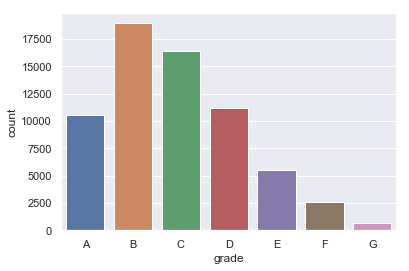

In [4]:
sns.countplot(x='grade', data=loans, order=sorted(loans['grade'].unique()))

We can see that over half of the loan grades are assigned values B or C. Each loan is assigned one of these grades, along with a more finely discretized feature called subgrade. These values depend on the loan application and credit report, and determine the interest rate of the loan. More information if you're interested can be found [here](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees).

Now let's look at another feature that will be used, "home ownership". This feature describes whether the loanee is mortaging, renting, or owns a home. We can see that a small percentage of the loanees own a home.

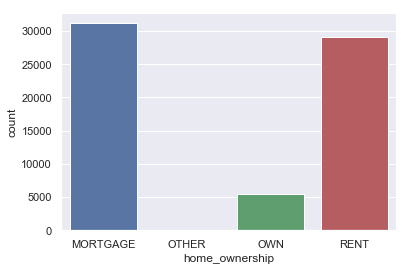

In [5]:
sns.countplot(x='home_ownership', data=loans, order=sorted(loans['home_ownership'].unique()))

## Investigate Data - Target
The target column (label column) of the dataset that we are interested in is called `bad_loans`. In this column 1 means a risky (bad) loan 0 means a safe loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

* +1 as a safe loan,
* -1 as a risky (bad) loan.

We put this in a new column called `safe_loans`.

In [6]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop(columns='bad_loans')

Now, let's explore the distribution of values for `safe_loans`. This gives us a sense of how many safe and risky loans are present in the dataset. 

In [7]:
only_safe = loans[loans['safe_loans'] == 1]
only_bad = loans[loans['safe_loans'] == -1]

print(f'Number safe  loans: {len(only_safe)} ({len(only_safe) * 100.0 / len(loans):.2f}%)')
print(f'Number risky loans: {len(only_bad)} ({len(only_bad) * 100.0 / len(loans):.2f}%)')

Number safe  loans: 42767 (64.88%)
Number risky loans: 23150 (35.12%)


---
# Preprocess Data for Learning
In this section, we pre-process the data to make it suitable for ML.

## Encode Categorical Features
We will be using both numeric and categorical features to predict if a loan is safe or risky.

In [ ]:
features = [
    'grade',                     # grade of the loan (e.g. A or B)
    'sub_grade',                 # sub-grade of the loan (e.g. A1, A2, B1)
    'short_emp',                 # one year or less of employment (0 or 1)
    'emp_length_num',            # number of years of employment (a number)
    'home_ownership',            # home_ownership status (one of own, mortgage, rent or other)
    'dti',                       # debt to income ratio (a number)
    'purpose',                   # the purpose of the loan (one of many values)
    'term',                      # the term of the loan (36 months or 60 months)
    'last_delinq_none',          # has borrower had a delinquincy (0 or 1)
    'last_major_derog_none',     # has borrower had 90 day or worse rating (0 or 1)
    'revol_util',                # percent of available credit being used (number between 0 and 100)
    'total_rec_late_fee',        # total late fees received to day (a number)
]

target = 'safe_loans'                   

# Extract the feature columns and target column
loans = loans[features + [target]]
loans.head()

In [9]:
loans = pd.get_dummies(loans)
features = list(loans.columns)
features.remove('safe_loans')
features

['short_emp',
 'emp_length_num',
 'dti',
 'last_delinq_none',
 'last_major_derog_none',
 'revol_util',
 'total_rec_late_fee',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improveme

Here is a preview of the new dataset. Notice our categorical features have become 0/1s represented over many columns (e.g. "grade" becamse "grade_A" through "grade_F").

---
# Model Training
 

In [10]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(loans, test_size=0.2, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=1).fit(train_data[features], train_data[target])

In [12]:
from sklearn import tree

small_tree_model = DecisionTreeClassifier(max_depth=2, random_state=1)
small_tree_model.fit(train_data[features], train_data[target])

try:
    import graphviz

    def draw_tree(tree_model, features):
        """
        visualizes a Decision Tree
        """
        tree_data = tree.export_graphviz(tree_model, 
                                     impurity=False, 
                                     feature_names=features,
                                     class_names=tree_model.classes_.astype(str),
                                     filled=True,
                                     out_file=None)
        graph = graphviz.Source(tree_data) 
        display(graph)
        
    draw_tree(small_tree_model, features)
except:
    print('Graphviz not installed. You can view the picture here! https://courses.cs.washington.edu/courses/cse416/19su/files/assignment-resources/concept/cq4/tree.png')

Graphviz not installed. You can view the picture here! https://courses.cs.washington.edu/courses/cse416/19su/files/assignment-resources/concept/cq4/tree.png


Each node in the tree shows
* If it's an internal node, show what feature and value it splits on
* `samples`: The number of samples at that node
* `value`: The counts for each label at that node
* `class`: The majority class at that node
* The color showing how confident it is in the predictions at that node (blue is class +1, orange is class -1, white is in between). This corresponds to the probability of it predicting a certain label.

## Making Predictions
Now that we have trained the model, let's look at how it makes predictions on a couple of examples it hasn't seen before from the validation dataset.

In [13]:
sample_validation_data_risky = validation_data[validation_data[target] == -1][0:2]
sample_validation_data_safe = validation_data[validation_data[target] == +1][0:2]
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)

In [14]:
predictions = decision_tree_model.predict(sample_validation_data[features])
actual = sample_validation_data[target]

In [15]:
decision_tree_model.predict_proba(sample_validation_data[features])

array([[0.04524181, 0.95475819],
       [0.30762676, 0.69237324],
       [0.90540541, 0.09459459],
       [0.60175055, 0.39824945]])

Now let's turn to the `small_tree_model` and have it make probability predictions for `sample_validation_data`. 

In [16]:
small_tree_model.predict_proba(sample_validation_data[features])

array([[0.13508962, 0.86491038],
       [0.44283896, 0.55716104],
       [0.44283896, 0.55716104],
       [0.44283896, 0.55716104]])

## Evaluating Accuracy of Model

Recall that the accuracy of a classifier is 

$$accuracy = \frac{\text{# correctly classified examples}}{\text{# total examples}}$$

For `sklearn`, we generally use `sklearn.metrics.accuracy_score` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) to instead of having to write out the formula itself.

First, calculate the training accuracy and the validation accuracy for the `small_tree_model`.

In [17]:
from sklearn.metrics import accuracy_score
train_predictions = small_tree_model.predict(train_data[features])
train_acc = accuracy_score(train_data[target], train_predictions)

val_predictions = small_tree_model.predict(validation_data[features])
val_acc = accuracy_score(validation_data[target], val_predictions)
val_acc

0.640625

In [18]:
train_predictions_2 = decision_tree_model.predict(train_data[features])
train_acc_2 = accuracy_score(train_data[target], train_predictions_2)

val_predictions_2 = decision_tree_model.predict(validation_data[features])
val_acc_2 = accuracy_score(validation_data[target], val_predictions_2)
val_acc_2

0.6623179611650486

In [19]:
big_tree_model = DecisionTreeClassifier(max_depth=10, random_state=1).fit(train_data[features], train_data[target])

In [20]:
train_predictions_3 = big_tree_model.predict(train_data[features])
train_acc_3 = accuracy_score(train_data[target], train_predictions_3)

val_predictions_3 = big_tree_model.predict(validation_data[features])
val_acc_3 = accuracy_score(validation_data[target], val_predictions_3)
val_acc_3

0.6612560679611651

# Finding Right Fit
As we saw in the previous example, if we aren't careful with how we set `max_depth`, our model can potentially overfit or underfit. 

A common way of limiting the depth of the tree is to consider two early stopping rules:
* When when the tree reaches a maximum depth (`max_depth`)
* When the leaf nodes have too few data samples in them (`min_samples_leaf`)

In [21]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'min_samples_leaf':[1, 10, 50, 100, 200, 300], 'max_depth':[1, 5, 10, 15, 20]}
search = GridSearchCV(DecisionTreeClassifier(), hyperparameters, cv=6, return_train_score=True).fit(train_data[features], train_data[target])
search.best_params_

{'max_depth': 10, 'min_samples_leaf': 300}

We can also plot the train and validation accuracy of the models for different settings of the hyper-parameters. The plot will be in 3D since there are 2 inputs for each model specification.

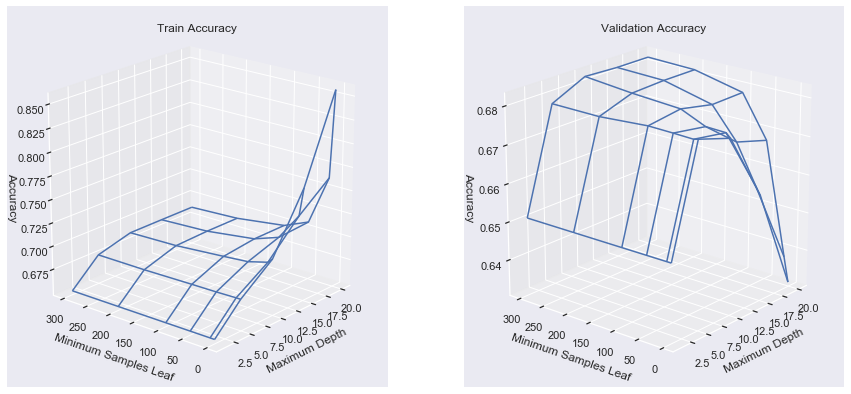

In [22]:
def plot_scores(ax, title, search, hyperparameters, score_key):
    cv_results = search.cv_results_
    scores = cv_results[score_key]
    scores = scores.reshape((len(hyperparameters['max_depth']), len(hyperparameters['min_samples_leaf'])))
    max_depths = cv_results['param_max_depth'].reshape(scores.shape).data.astype(int)
    min_samples_leafs = cv_results['param_min_samples_leaf'].reshape(scores.shape).data.astype(int)
    
    ax.plot_wireframe(max_depths, min_samples_leafs, scores)
    ax.view_init(20, 220)
    ax.set_xlabel('Maximum Depth')
    ax.set_ylabel('Minimum Samples Leaf')
    ax.set_zlabel('Accuracy')
    ax.set_title(title)


fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

plot_scores(ax1, 'Train Accuracy', search, hyperparameters, 'mean_train_score')
plot_scores(ax2, 'Validation Accuracy', search, hyperparameters, 'mean_test_score')

--- 
# Random Forest


In [29]:
import scipy.stats 

class RandomForest416: 
    """
    This class implements the common sklearn model interface (has a fit and predict function).
    
    A random forest is a collection of decision trees that are trained on random subsets of the 
    dataset. When predicting the value for an example, takes a majority vote from the trees.
    """
    
    def __init__(self, num_trees, max_depth=None):
        """
        Constructs a RandomForest416 that uses the given numbner of trees, each with a 
        max depth of max_depth.
        """
        # the self._trees object is a list of models, you can use it in the next function to loop over
        # and fit the models one by one
        self._trees = [
            DecisionTreeClassifier(max_depth=max_depth) 
            for i in range(num_trees)
        ]
        
    def fit(self, X, y):
        """
        Takes an input dataset X and a series of targets y and trains the RandomForest416.
        
        Each tree will be trained on a random sample of the data that samples the examples
        uniformly at random (with replacement). Each random dataset will have the same number
        of examples as the original dataset, but some examples may be missing or appear more 
        than once due to the random sampling with replacement.
        """    
        # TODO implement this method!
        for i in range(len(self._trees)):
            random_indicies = np.random.randint(len(X), size = len(X))
            samples = X.iloc[random_indicies]
            targets = y.iloc[random_indicies]
            model = self._trees[i].fit(samples, targets)
            
            

    def predict(self, X):
        """
        Takes an input dataset X and returns the predictions for each example in X.
        """
        
        # Builds up a 2d array with n rows and T columns
        # where n is the number of points to classify and T is the number of trees
        predictions = np.zeros((len(X), len(self._trees)))
        for i, tree in enumerate(self._trees):
            # Make predictions using the current tree
            preds = tree.predict(X)
            
            # Store those predictions in ith column of the 2d array
            predictions[:, i] = preds
            
        # For each row of predictions, find the most frequent label (axis=1 means across columns)
        return scipy.stats.mode(predictions, axis=1)[0]

In [30]:
rf = RandomForest416(2, max_depth=1)
rf.fit(sample_validation_data[features], sample_validation_data[target])
rf.predict(sample_validation_data[features])

array([[ 1.],
       [ 1.],
       [-1.],
       [-1.]])

Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25


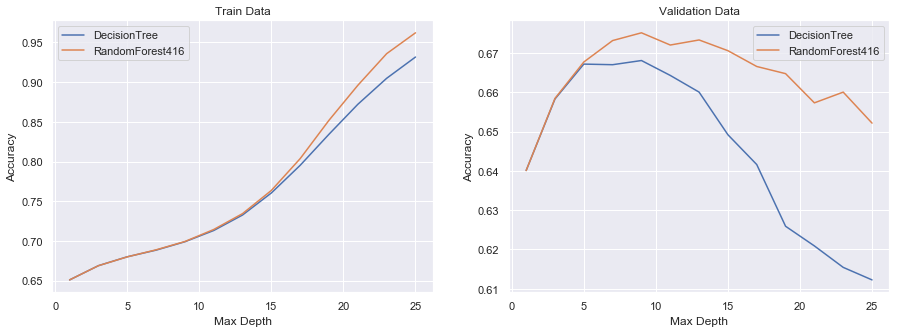

In [31]:
# First calculate the accuracies for each depth
depths = list(range(1, 26, 2))
dt_accuracies = []
rf_accuracies = []

for i in depths:
    print(f'Depth {i}')
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(train_data[features], train_data[target])

    dt_accuracies.append((
        accuracy_score(tree.predict(train_data[features]), train_data[target]),
        accuracy_score(tree.predict(validation_data[features]), validation_data[target])
    ))
    
    
    rf = RandomForest416(15, max_depth=i)
    rf.fit(train_data[features], train_data[target])
    
    rf_accuracies.append((     
        accuracy_score(rf.predict(train_data[features]), train_data[target]),
        accuracy_score(rf.predict(validation_data[features]), validation_data[target])
    ))
    
# Then plot them 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(depths, [acc[0] for acc in dt_accuracies], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_accuracies], label='RandomForest416')

axs[1].plot(depths, [acc[1] for acc in dt_accuracies], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_accuracies], label='RandomForest416')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')